![Logo](logoGalileo.png "Logo")
***      
# TEXT MINING & IMAGE RECOGNITION *Seccion* * "V"*
## *LABORATORIO # 1*
##### **Pedro Josué Chamale Perez** - __23000478__

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

*** 
#### Problema No.1
##### Desarrolle una funci´on la cual reciba dos par´ametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes puntos:

In [52]:
# Definiendo la funcion
def TransformacionImagen(receiveimg, color):
    # Convirtiendo imagen de BGR a RGB
    rgb = cv2.cvtColor(receiveimg, cv2.COLOR_BGR2RGB)

    #Dividiendo la imagen por canal de color
    r, g, b = cv2.split(receiveimg)
    if color == 1:  # Si el entero es 1 se muestra unicamente el canal azul
        plt.imshow(b)
        plt.title('Canal Azul')
        plt.show()
    elif color ==2: # Si el entero es 2 se muestra unicamente el canal verde
        plt.imshow(g)
        plt.title('Canal Verde')
        plt.show()
    elif color ==3: # Si el entero es 3 se muestra unicamente el canal rojo
        plt.imshow(r)
        plt.title('Canal Rojo')
        plt.show()
    elif color ==10: # Si el entero es 10 se muestra el canal rojo y verde
        imagen_red_green = np.copy(receiveimg)
        imagen_red_green[:,:,2]=0
        plt.imshow(imagen_red_green)
        plt.title('Canal Rojo-Verde')
        plt.show()
    elif color ==20: # Si el entero es 20 se muestra el canal verde y azul
        imagen_green_blue = np.copy(receiveimg)
        imagen_green_blue[:,:,0]=0
        plt.imshow(imagen_green_blue)
        plt.title('Canal Verde-Azul')
        plt.show()
    elif color ==30: # Si el entero es 30 se muestra el canal rojo y azul
        imagen_red_blue = np.copy(receiveimg)
        imagen_red_blue[:,:,1]=0
        plt.imshow(imagen_red_blue)
        plt.title('Canal Rojo-Azul')
        plt.show()
    else:
        print('Ingrese una opcion correcta')


In [53]:
#Cargando la imagen
loadimg = cv2.imread('Mario.jpg')
#cv2.imshow('Original', imagen)

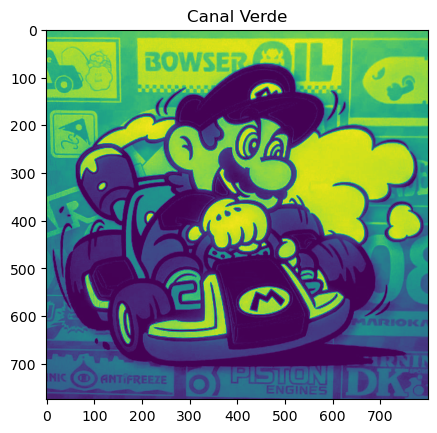

In [54]:
TransformacionImagen(loadimg,2)

*** 
#### Problema No.2
##### En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la imagen original a color.

In [55]:
def imagengray_original(imagen1,imagen2,imagen3):
    imagen1[:,:,1]=0
    imagen1[:,:,2]=0

    imagen2[:,:,0]=0
    imagen2[:,:,2]=0

    imagen3[:,:,0]=0
    imagen3[:,:,1]=0

    plt.imshow(imagen1 + imagen2 + imagen3)
    plt.title('Imagen Original a Color')
    plt.show()


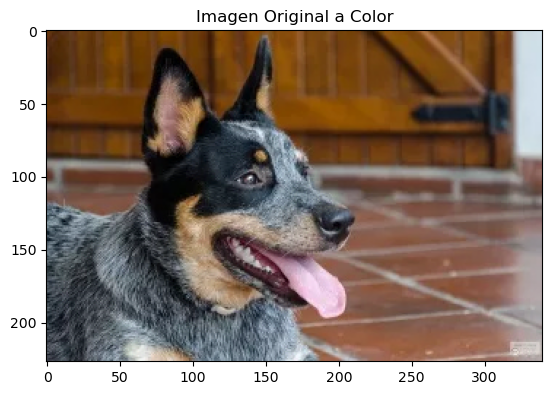

In [56]:
imagen1 = cv2.imread('perro_salida_gray_rojo.jpg')
imagen2 = cv2.imread('perro_salida_gray_verde.jpg')
imagen3 = cv2.imread('perro_salida_gray_azul.jpg')

imagengray_original(imagen1, imagen2, imagen3)

*** 
#### Problema No.3
##### Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [57]:
def image_gray_3d(problema3_imagen):
    problema3_rgb = cv2.cvtColor(problema3_imagen, cv2.COLOR_BGR2RGB)

    problema3_gray_red = np.copy(problema3_rgb)
    problema3_gray_red[:,:,1] = problema3_gray_red[:,:,0]
    problema3_gray_red[:,:,2] = problema3_gray_red[:,:,0]

    plt.imshow(problema3_gray_red)
    plt.title('Canal Gray-Red')
    plt.show()

    problema3_gray_green = np.copy(problema3_rgb)
    problema3_gray_green[:,:,0] = problema3_gray_green[:,:,1]
    problema3_gray_green[:,:,2] = problema3_gray_green[:,:,1]

    plt.imshow(problema3_gray_green)
    plt.title('Canal Gray-Green')
    plt.show()

    problema3_gray_blue = np.copy(problema3_rgb)
    problema3_gray_blue[:,:,0] = problema3_gray_blue[:,:,2]
    problema3_gray_blue[:,:,1] = problema3_gray_blue[:,:,2]

    plt.imshow(problema3_gray_blue)
    plt.title('Canal Gray-Blue')
    plt.show()

    problema3_gray_red[:,:,1] = 0
    problema3_gray_red[:,:,2] = 0

    problema3_gray_green[:,:,0] = 0
    problema3_gray_green[:,:,2] = 0

    problema3_gray_blue[:,:,0] = 0
    problema3_gray_blue[:,:,1] = 0

    plt.imshow(problema3_gray_red + problema3_gray_green + problema3_gray_blue)
    plt.title('Union canales')
    plt.show()


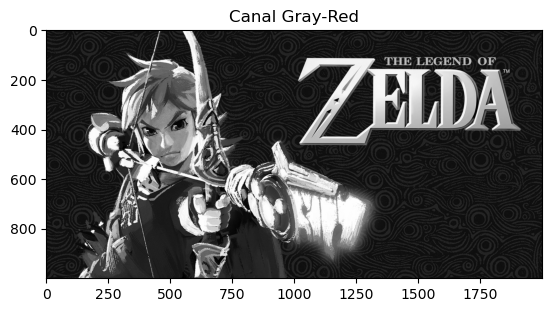

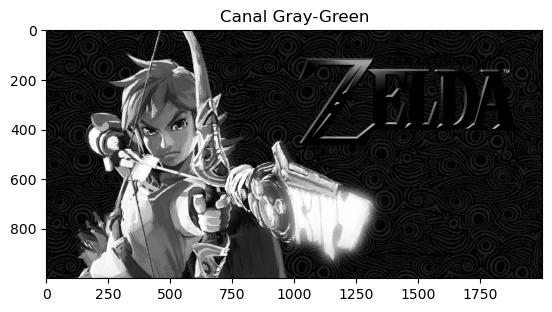

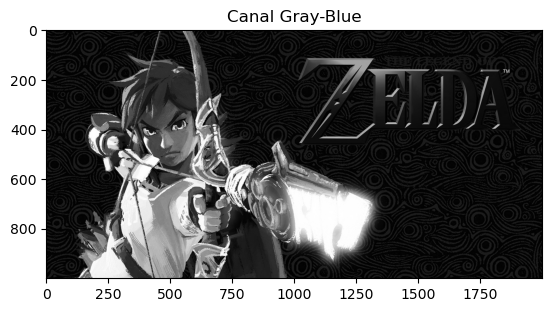

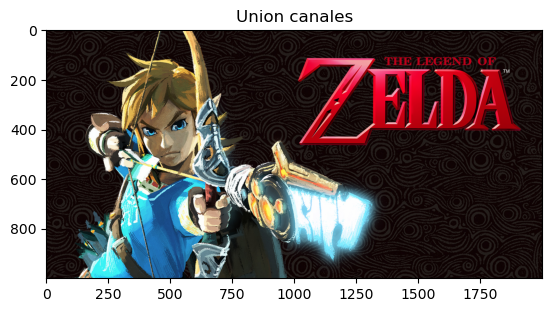

In [58]:
#Cargando Imagen
problema3_imagen = cv2.imread('zelda.jpg')

image_gray_3d(problema3_imagen)

#### Problema No.4
##### Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de la distribucion

In [59]:
def Hist_canal_color(problema4_rgb):
    problema4_rgb = cv2.cvtColor(problema4_imagen, cv2.COLOR_BGR2RGB)
    plt.imshow(problema4_rgb)
    plt.show()

    color = ('r','g','b')
    new_color = ('Rojo', 'Verde', 'Azul')

    for i, c in enumerate(color):
        hist = cv2.calcHist([problema4_rgb], [i], None,[256],[0,256])
        plt.title('Histograma Canal ' + new_color[i])
        plt.xlabel('Intensidades')
        plt.ylabel('Pixels')
        plt.plot(hist, color= c)
        plt.axvline(x=np.mean(problema4_rgb[:,:,i]), color=c)
        plt.xlim([0,256])
        plt.show()

    #Convirtiendo imagen a escala de grises para la creacion del histograma usando la media aritmetica
    alto = problema4_rgb.shape[0]
    ancho = problema4_rgb.shape[1]
    canales = problema4_rgb.shape[2]

    gris_ponderada = np.zeros((alto, ancho, 1)) #salida para escala de grises

    for x in range(0, alto):
           for y in range(0, ancho):
                  pixel = problema4_rgb[x, y]

                  blue = pixel[2]
                  green = pixel[1]
                  red = pixel[0]

                  gris_ponderada[x, y] = int(np.mean(red + green + blue))

    problema4_gray = cv2.imwrite("problema4_gray.jpg", gris_ponderada)
    #Grafica de Histograma para la imagen en escala de grises
    gris = cv2.imread('problema4_gray.jpg')
    hist2 = cv2.calcHist([gris], [0], None,[256],[0,256])
    plt.title('Histograma en Escala de Grises con media Aritmetica')
    plt.xlabel('Intensidades')
    plt.ylabel('Pixels')
    plt.plot(hist2, color= 'gray')
    plt.axvline(x=np.mean(gris), color='gray')
    plt.xlim([0,256])
    plt.show()

    



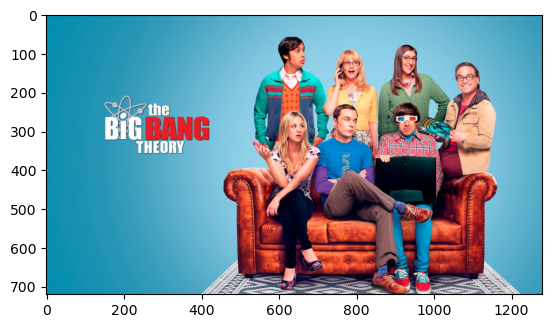

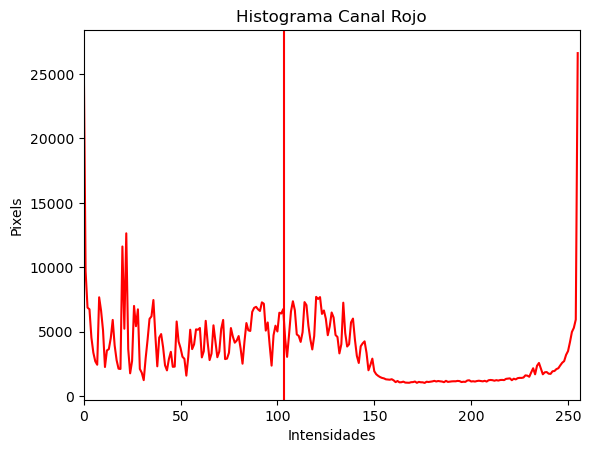

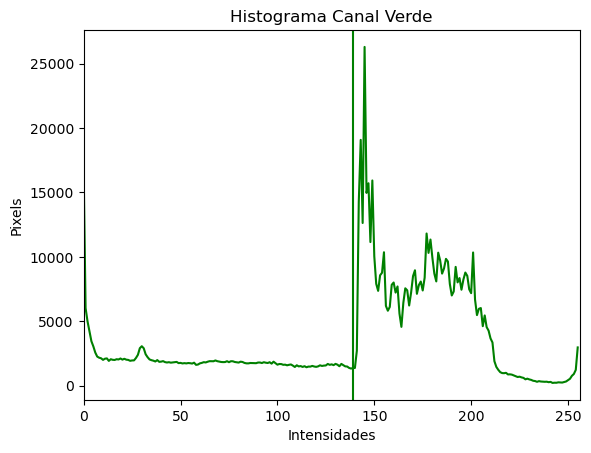

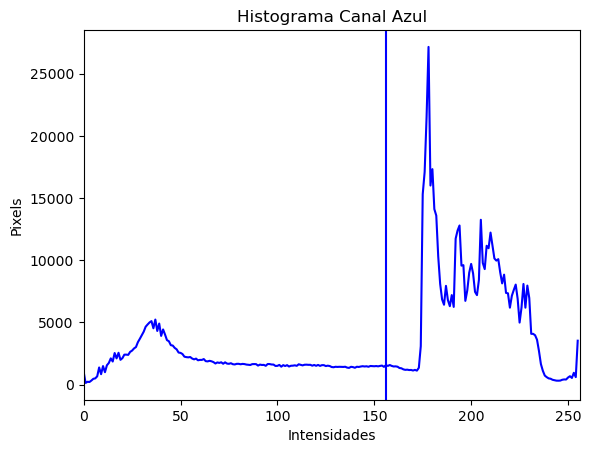

C:\Users\ChamalePJ\AppData\Local\Temp\ipykernel_10884\1510603178.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
  gris_ponderada[x, y] = int(np.mean(red + green + blue))


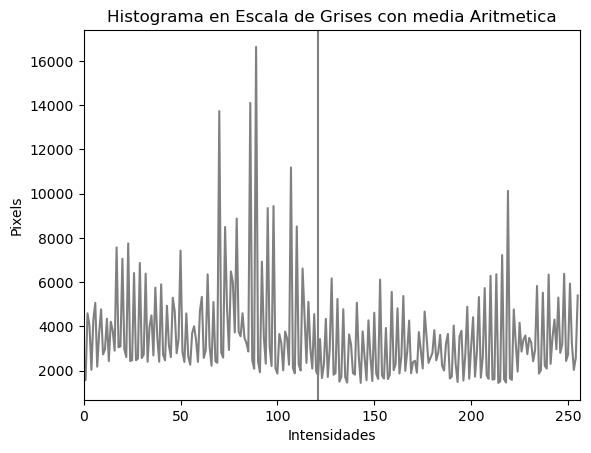

In [60]:
#Cargando Imagen
problema4_imagen = cv2.imread('thebigbangtheory.jpg')

Hist_canal_color(problema4_imagen)

#### Problema No.5
##### Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho especio, para entregar este ejercicio puede hacer con un archivo PDF

## El modelo de color HSV

El modelo de color HSV se basa en un sistema de color en el que el espacio de color se representa mediante un único cono. Los tres componentes del cono son tono, saturación y valor, como se muestra en la siguiente ilustración:

Cono de modelo de color HSV
En el modelo de color HSV, se cumple lo siguiente:

<img src="HSVCono.png">

- Tono: especifica el tono (color) establecido para el color. El tono se indica como un entero del 0 al 240, ambos incluidos. Este se remuestrea a partir de los valores de 0° a 360° en que se indica el tono como ángulo en sentido antihorario alrededor del cono de color. Los colores primarios y secundarios presentan los siguientes valores de tono: rojo = 0 (0°), amarillo = 40 (60°), verde = 80 (120°), cian = 120 (180°), azul = 160 (240°) y magenta = 201 (300°).
    
- Saturación: especifica la intensidad de saturación establecida para el color. La saturación se indica como un entero del 0 al 255, ambos incluidos (que representan del 0 al 100%). La saturación de un color hace referencia a la medida en que se aleja de un color neutro como el gris o, dicho de un modo más sencillo, su colorido. Cuando la saturación es de 255, el color presenta una saturación máxima. Cuando el valor de la saturación es 0, el color es no saturado y parece gris (a menos que el valor sea 0 ó 255, en cuyo caso aparece negro o blanco).
    
- Brillo: especifica la intensidad del blanco en el color. El valor se indica como un entero del 0 al 255, ambos incluidos (que representan del 0 al 100%). Un color con un valor establecido en 0 aparece negro. Un color con un valor establecido en 255 y una saturación de 0 aparece como blanco.

### Como Mapear Colores en dicho espacio

Al procesar imágenes en programación, las convertimos en variables con valores numéricos y trabajamos sobre dichos valores. Cada imagen puede tener algunos colores deseados.

Usamos modelos de color para asignar estos colores a valores numéricos. Algunos modelos de color comunes son RGB, CMYK, HSV y más. Podemos usar la biblioteca opencv para procesar y trabajar con imágenes y videos en Python. Esta biblioteca está llena de funciones que pueden implementar algoritmos y técnicas complejas para imágenes.

De forma predeterminada, el modelo de color RGB representa los colores en las imágenes. Esto se debe a que RGB es el modelo de color más utilizado en gráficos y puede representar un amplio espectro de colores.

Sin embargo, uno de los modelos más útiles es el modelo HSV. El modelo HSV se utiliza para representar las gamas de colores del modelo RGB en forma cilíndrica. Este espacio de color se usa mucho para el seguimiento de objetos.El modelo de color HSV significa Hue, Saturation y Brightness (Value).

El atributo Hue se usa para especificar el matiz del color que se está usando, y el atributo Saturation determina la cantidad en la que se usa el color. El atributo Valor se utiliza para especificar el brillo del color.

Usando la biblioteca opencv, podemos convertir imágenes de un espacio de color a otro. Para ello utilizamos la función cvtColor(). Cuando se lee una imagen usando la función imread(), está en el espacio de color RGB. Podemos convertir esto a HSV usando la función cvtColor().